In [1]:
import pandas as pd
import seaborn as sns

import sys
sys.path.append('/Users/familyafanasyevy/Documents/Денис/Skillfactory/vulnerable_populations/additional_functions')
from functions import to_modify_dataframe, transform_to_changes

##### Прочитаем файл с данными о численности населения регионов РФ и сразу оставим только те столбцы, в которых нет пропусков, а также только те регионы РФ, которые существуют в настоящий момент.

In [2]:
population = pd.read_excel(io='../social_russia_data/population.xlsx', sheet_name=0, header=1, index_col=0, usecols='A, C:Z', skiprows=range(167, 320))
population = to_modify_dataframe(population)
population.head()

Число регионов России - 85.


,январь 2015 г.,январь 2016 г.,январь 2017 г.,январь 2018 г.,январь 2019 г.,январь 2020 г.,январь 2021 г.,январь 2022 г.
Белгородская область,1547936.0,1550137.0,1552865.0,1549876.0,1547418.0,1549151.0,1541259.0,1531917.0
Брянская область,1232940.0,1225741.0,1220530.0,1210982.0,1200187.0,1192491.0,1182682.0,1168771.0
Владимирская область,1405613.0,1397168.0,1389599.0,1378337.0,1365805.0,1358416.0,1342099.0,1323659.0
Воронежская область,2331147.0,2333477.0,2335408.0,2333768.0,2327821.0,2324205.0,2305608.0,2287678.0
Ивановская область,1036909.0,1029838.0,1023170.0,1014646.0,1004180.0,997135.0,987032.0,976918.0


##### Посмотрим на корреляцию между оставшимися признаками.

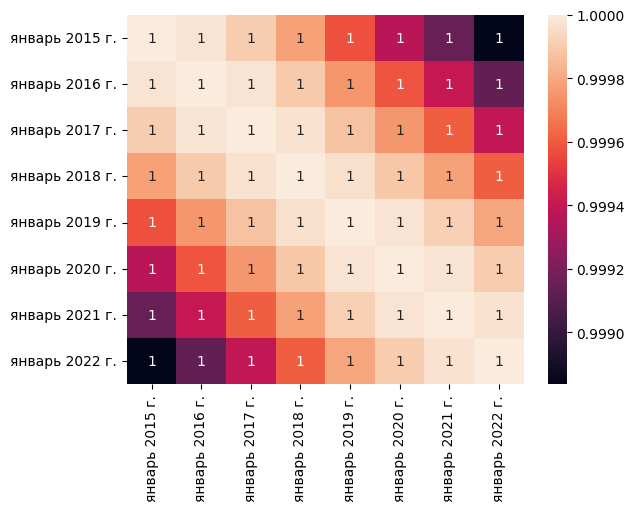

In [3]:
sns.heatmap(population.corr(), annot=True);

##### Поскольку мы наблюдаем абсолютную корреляцию между численностью населения от года к году, то такую таблицу рассматривать не имеет смысла вовсе, либо оставить только какой-нибудь один её столбец.
##### В связи с этим я предлагаю посмотреть не на саму численность населения в каждом регионе, а рассмотреть динамику численности населения в каждом регионе от года к году. То есть будем рассматривать, например, как изменилась численность (в процентах) в 2016 году по сравнению с 2015 годом и т.д. 

In [4]:
population_changes = transform_to_changes(population)
population_changes = population_changes.rename(lambda arg: f"Динамика населения на {arg.split(' ')[1]} г., в %", axis=1)
population_changes.head()

,"Динамика населения на 2016 г., в %","Динамика населения на 2017 г., в %","Динамика населения на 2018 г., в %","Динамика населения на 2019 г., в %","Динамика населения на 2020 г., в %","Динамика населения на 2021 г., в %","Динамика населения на 2022 г., в %"
Белгородская область,0.142189,0.175984,-0.192483,-0.158593,0.111993,-0.509440,-0.606128
Брянская область,-0.583889,-0.425131,-0.782283,-0.891425,-0.641233,-0.822564,-1.176225
Владимирская область,-0.600805,-0.541739,-0.810450,-0.909212,-0.541000,-1.201178,-1.373967
Воронежская область,0.099951,0.082752,-0.070223,-0.254824,-0.155338,-0.800145,-0.777669
Ивановская область,-0.681931,-0.647480,-0.833097,-1.031493,-0.701567,-1.013203,-1.024688


##### И посмотрим на корреляцию получившихся признаков.

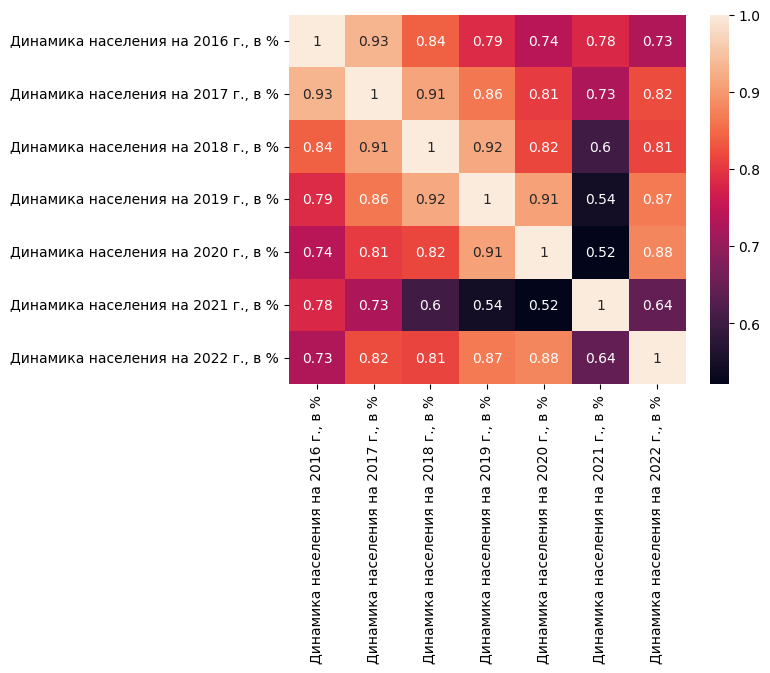

In [5]:
sns.heatmap(population_changes.corr(), annot=True);

##### Вот здесь картина уже совершенно иная - абсолютной корреляции между признаками нет. Но всё же имеются признаки с очень сильной корреляцией (выше 0.9 по абсолютной величине). Давайте оставим только по одному представителю из каждой пары коррелированных признаков.

In [6]:
population_changes = population_changes.drop(columns=['Динамика населения на 2017 г., в %', 'Динамика населения на 2019 г., в %'])

##### Сохраним полученные данные в отдельный файл.

In [7]:
population_changes.to_csv('../datasets_mod/population_changes.csv', sep=',')